# Random Walk Generator #

Recall that the stochastic model for asset returns is given by the Geometric Brownian Motion process:

$$ \frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t $$

When we generate simulated returns, we can usually ignore the decomposition of $\mu$ since we only care about the net effective drift term without worrying about what the components of it are.

The implementation is really very close to the equation above, although it can be optimized in many ways, this is the most direct translation of the equation:

In [2]:
import numpy as np
import pandas as pd

In [4]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of stock price using Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # Convert rets to prices
    prices = s_0*(1+rets).cumprod()
    return prices

In [12]:
p = gbm(10, n_scenarios=3)

In [6]:
p.shape

(120, 3)

In [13]:
p.head()

,0,1,2
0,96.515578,100.071723,100.113960
1,98.878619,103.150011,97.967096
2,104.486149,99.028219,94.944721
3,102.612695,102.464156,96.593753
4,109.590937,110.457928,107.118626


<AxesSubplot:>

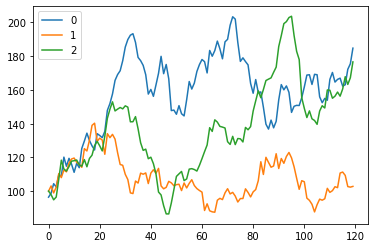

In [14]:
p.plot()

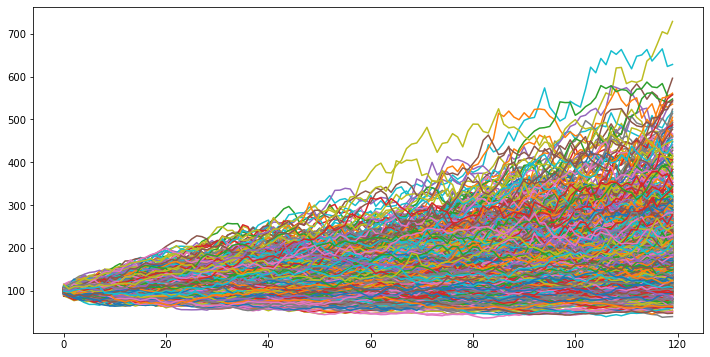

In [16]:
p = gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [17]:
p = gbm(n_years=10, n_scenarios=1000)

In [18]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of stock price using Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps, n_scenarios))
    # Convert rets to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

<AxesSubplot:>

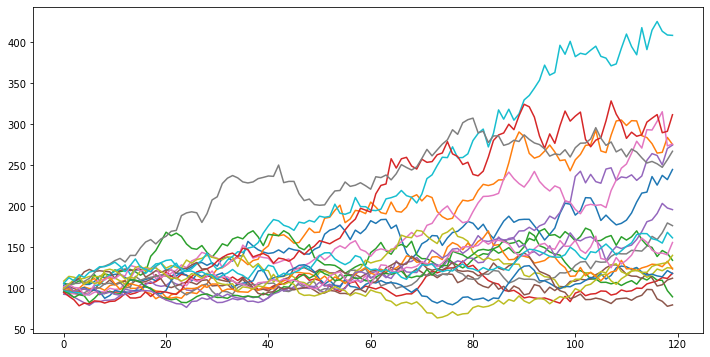

In [20]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [21]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of stock price using Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    # Convert rets to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

<AxesSubplot:>

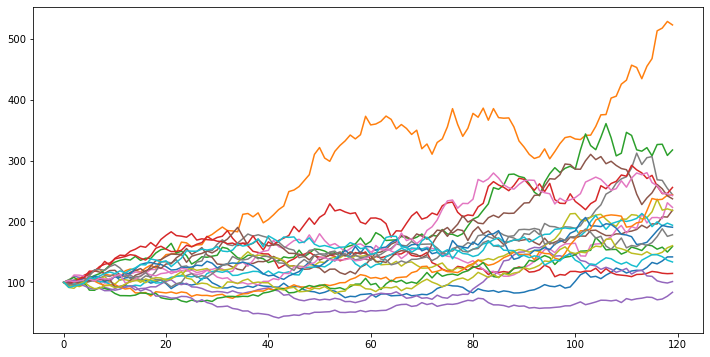

In [22]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [23]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,102.512845,104.501355,101.550404,100.784539,102.099569,101.864916,106.409282,102.271530,99.898965,107.630982
2,98.941402,112.525425,102.000144,104.270669,101.234174,110.501931,97.829887,102.863067,101.834209,108.459706
3,105.047215,118.905438,115.080320,104.088881,95.750759,115.113822,91.028826,108.470621,100.958062,105.854300
4,101.291000,108.624267,113.758383,96.223039,90.287107,111.651030,91.518856,110.194315,105.281370,111.949754
